# Snow Cover Extent HighResMIP comparison
conda env: `phd_v3`

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


## Set variables

In [3]:
period = slice('1999','2012')
latlim, lonlim = u.get_domain_HMA()
seasons = ['DJF', 'JJA']

# Make a extended version for regridding properly on the edges
latlim_ext, lonlim_ext = slice(latlim.start-5, latlim.stop+5), slice(lonlim.start-5, lonlim.stop+5)

# Get zone limits for annual cycle
lonlim_HK, latlim_HK, lonlim_HM, latlim_HM, lonlim_TP, latlim_TP = u.get_zones()

# HMA for full domain and the following for the above zones
zones = ['HMA', 'HK', 'HM', 'TP']
zones_df = pd.DataFrame(
    [[lonlim, latlim], [lonlim_HK, latlim_HK], [lonlim_HM, latlim_HM], [lonlim_TP, latlim_TP]], 
    columns=pd.Index(['lonlim', 'latlim'], name='Limits'),
    index=pd.Index(zones, name='Zones')
)

var = 'snc'
table = u.get_table(var)
label, units, levels, cmap, extend, levels_diff, cmap_diff, extend_diff, levels_bias, cmap_bias, extend_bias = u.get_var_infos(var)
label

'Snow Cover Extent'

## Load Snow Cover Extent for: obs, HR, LR
Compare LR from HighResMIP experiment and historical CMIP6 (not exactly same forcing)

In [8]:
da_LR = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/LImon/snc/gr/latest/*.nc', combine='by_coords'
).snc.sel(lat=latlim_ext, lon=lonlim_ext).sel(time=period).load()

da_LR_HR = xr.open_mfdataset(
    '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-LR/highresSST-present/r1i1p1f1/LImon/snc/gr/latest/*.nc', combine='by_coords'
).snc.sel(lat=latlim_ext, lon=lonlim_ext).sel(time=period).load()

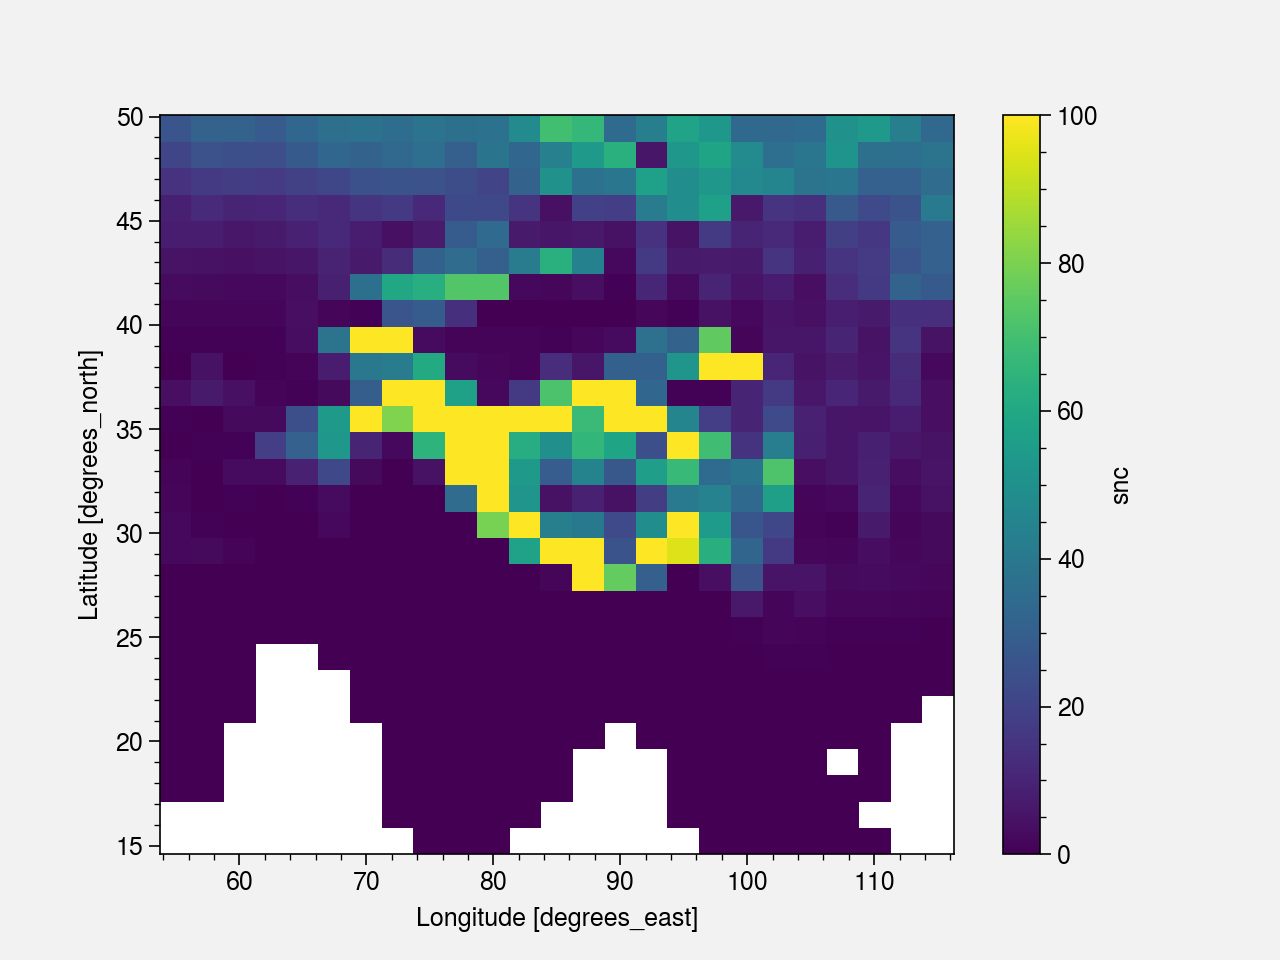

In [12]:
da_LR_HR.mean('time').plot()

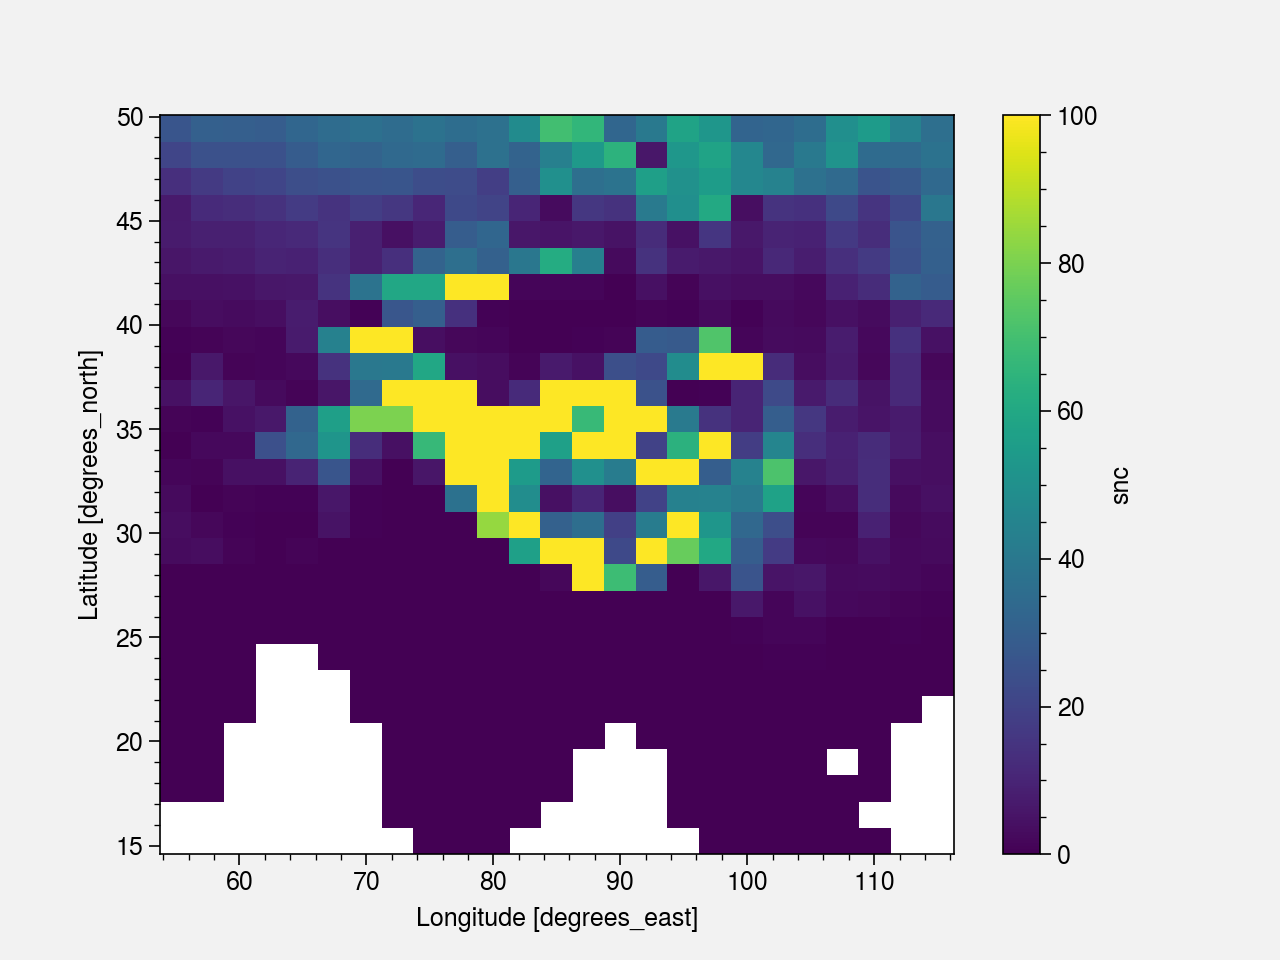

In [13]:
da_LR.mean('time').plot()

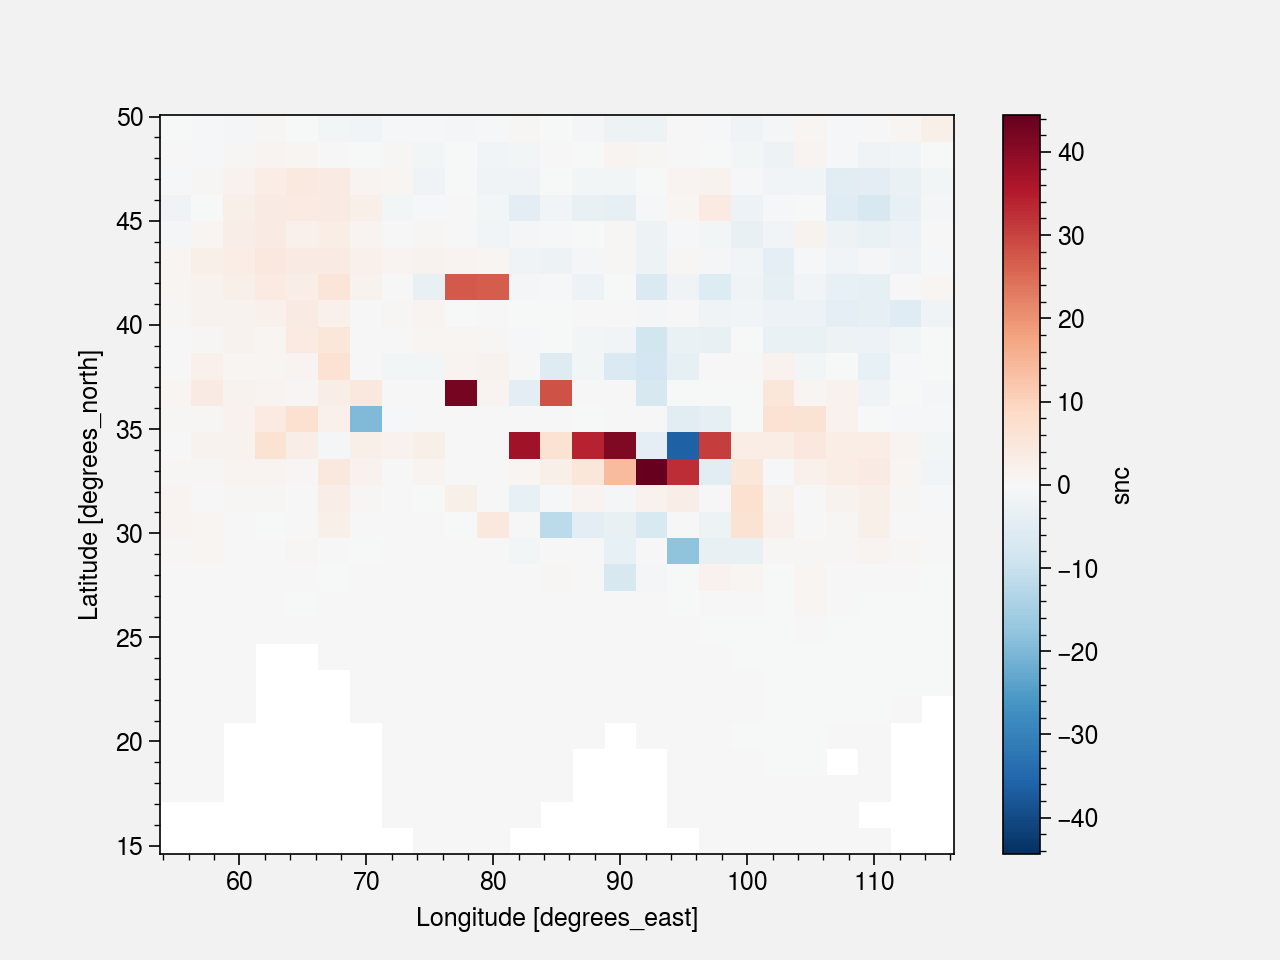

In [14]:
( da_LR.mean('time') - da_LR_HR.mean('time') ).plot()

# Compare HR and LR
In `/bdd/CMIP6/HighResMIP/IPSL`:
- IPSL-CM6A-ATM-HR
- IPSL-CM6A-LR
- IPSL-CM7A-ATM-HR
- IPSL-CM7A-ATM-LR

## Load observations MEaSUREs
MEaSUREs Northern Hemisphere Terrestrial Snow Cover Extent Daily 25km EASE-Grid 2.0, Version 1 (https://nsidc.org/data/nsidc-0530) (Date Accessed: 02/03/2020)

This data set, part of the NASA Making Earth System Data Records for Use in Research Environments (MEaSUREs) program, offers users 25 km Northern Hemisphere snow cover extent represented by four different variables. Three of the snow cover variables are derived from the Interactive Multisensor Snow and Ice Mapping System, MODIS Cloud Gap Filled Snow Cover, and passive microwave brightness temperatures, respectively. The fourth variable merges the three source products into a single representation of snow cover.

Temporal Coverage:	1 January 1999 to 31 December 2012  
Version(s):	V1  
Temporal Resolution	1 day

In [4]:
obs = xr.open_mfdataset(
'/data/mlalande/MEaSUREs/monthly/nhtsd25e2_*_v01r01.nc', combine='by_coords'
).merged_snow_cover_extent.sel(time=period).load() * 100
obs = obs.rename({'longitude': 'lon', 'latitude': 'lat'})

In [8]:
u.get_human_readable_size(obs.nbytes)

'332 MB'

In [25]:
obs

<xarray.DataArray 'merged_snow_cover_extent' (time: 168, rows: 720, cols: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    lat      (rows, cols) float32 nan nan nan nan nan ... nan nan nan nan nan
    lon      (rows, cols) float32 nan nan nan nan nan ... nan nan nan nan nan
  * cols     (cols) int32 -8987500 -8962500 -8937500 ... 8937500 8962500 8987500
  * rows     (rows) int32 8987500 8962500 8937500 ... -8937500 -8962500 -8987500
  * time     (time) datetime64[ns] 1999-01-01 1999-02-01 ... 2012-12-01

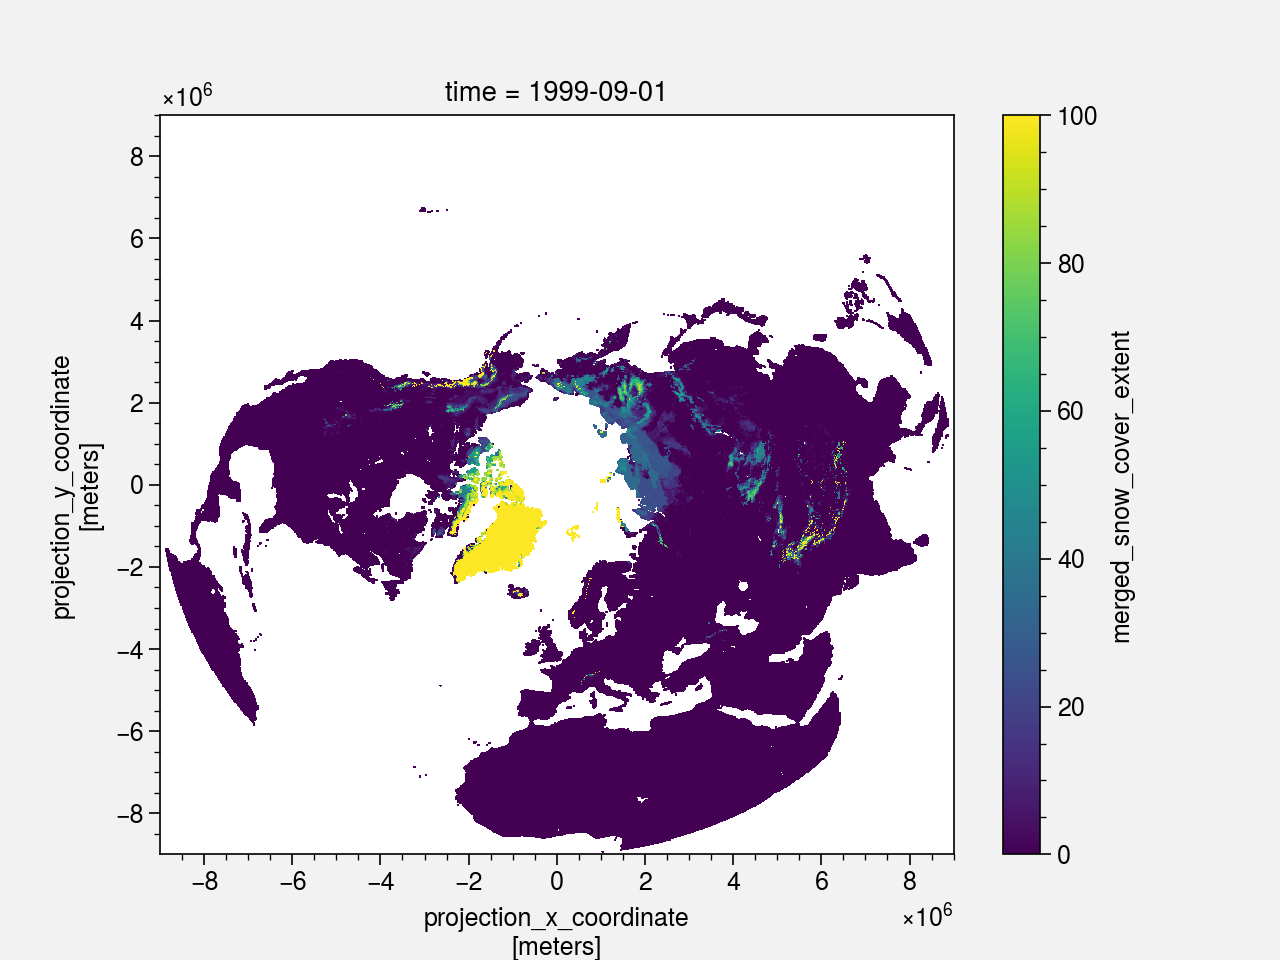

In [22]:
obs[8].plot()

## Load models

In [23]:
da_HR = xr.open_mfdataset(
    '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-ATM-HR/highresSST-present/r1i1p1f1/LImon/snc/gr/latest/*.nc', combine='by_coords'
).snc.sel(time=period).load()

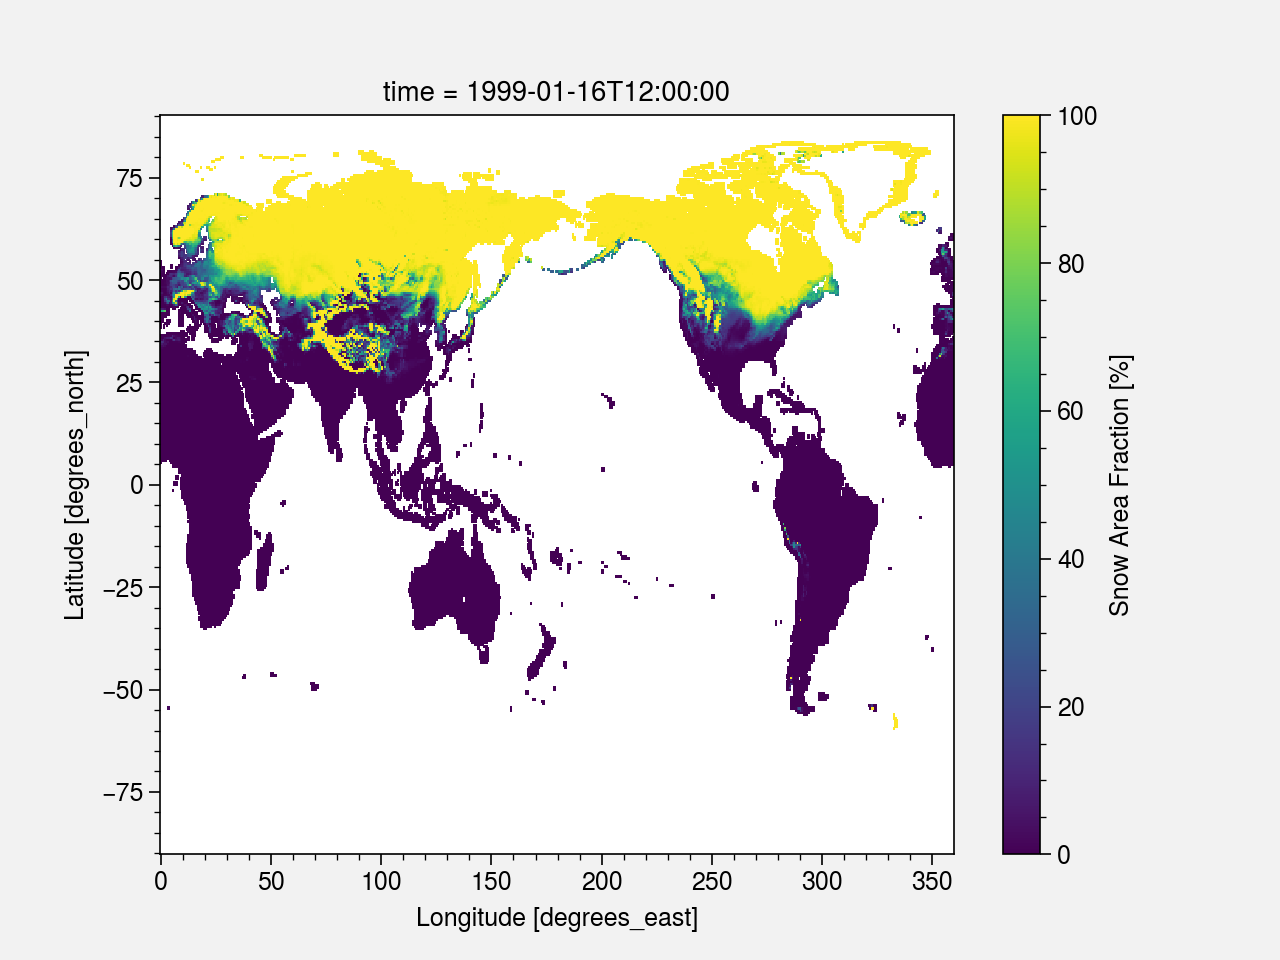

In [26]:
da_HR[0].plot()

## Regrid obs to model

In [27]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Regrid obs
regridder = xe.Regridder(obs, da_HR, 'bilinear', periodic=False, reuse_weights=True)
regridder = add_matrix_NaNs(regridder)
obs_regrid = regridder(obs)

Create weight file: bilinear_720x720_361x512.nc


/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


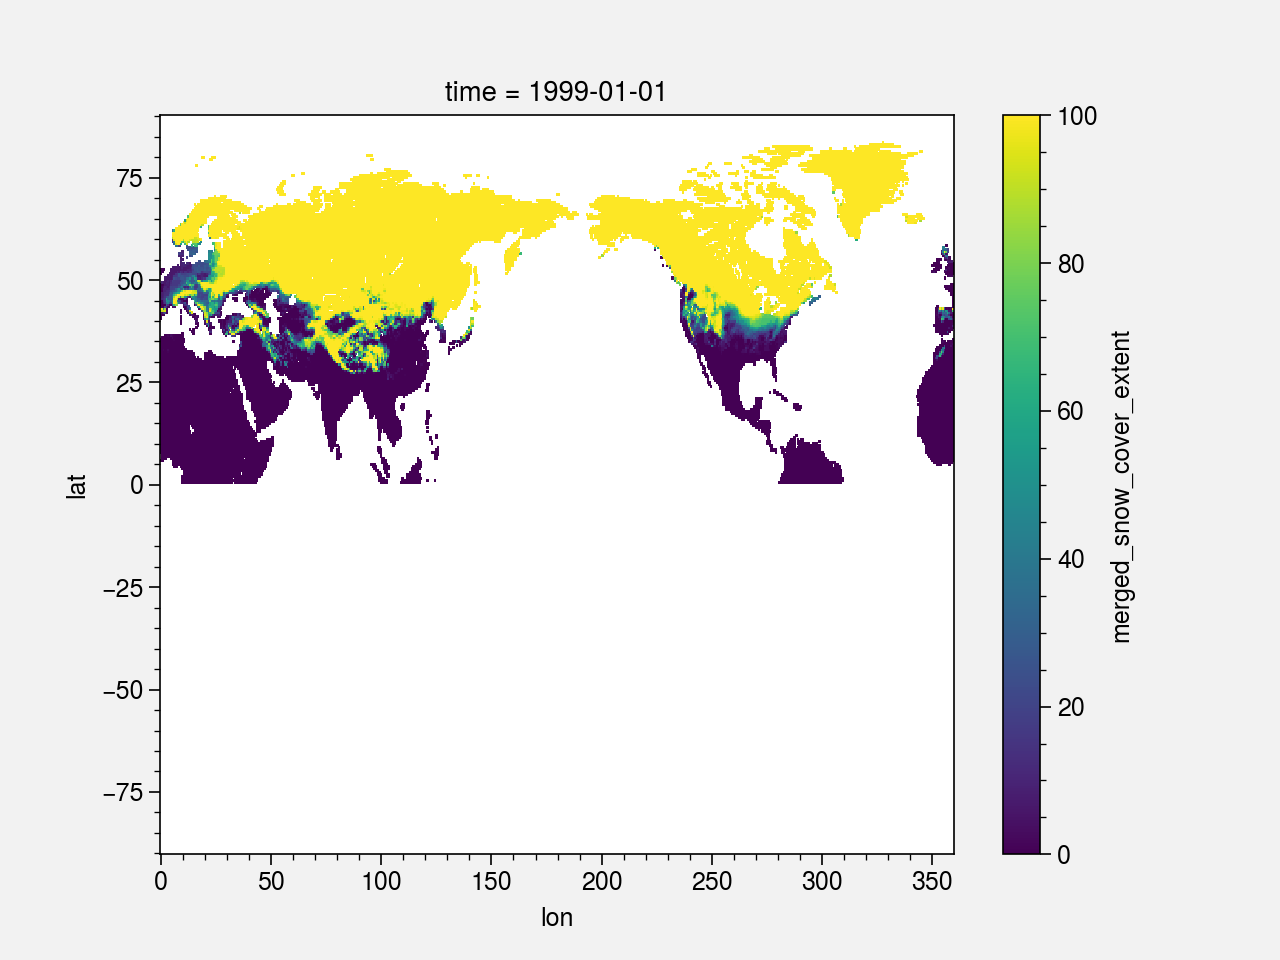

In [28]:
obs_regrid[0].plot()

In [33]:
obs_regrid_NH_mon_clim = obs_regrid.sel(lat=slice(0,90)).groupby('time.month').mean('time')
da_HR_NH_mon_clim = da_HR.sel(lat=slice(0,90)).groupby('time.month').mean('time')

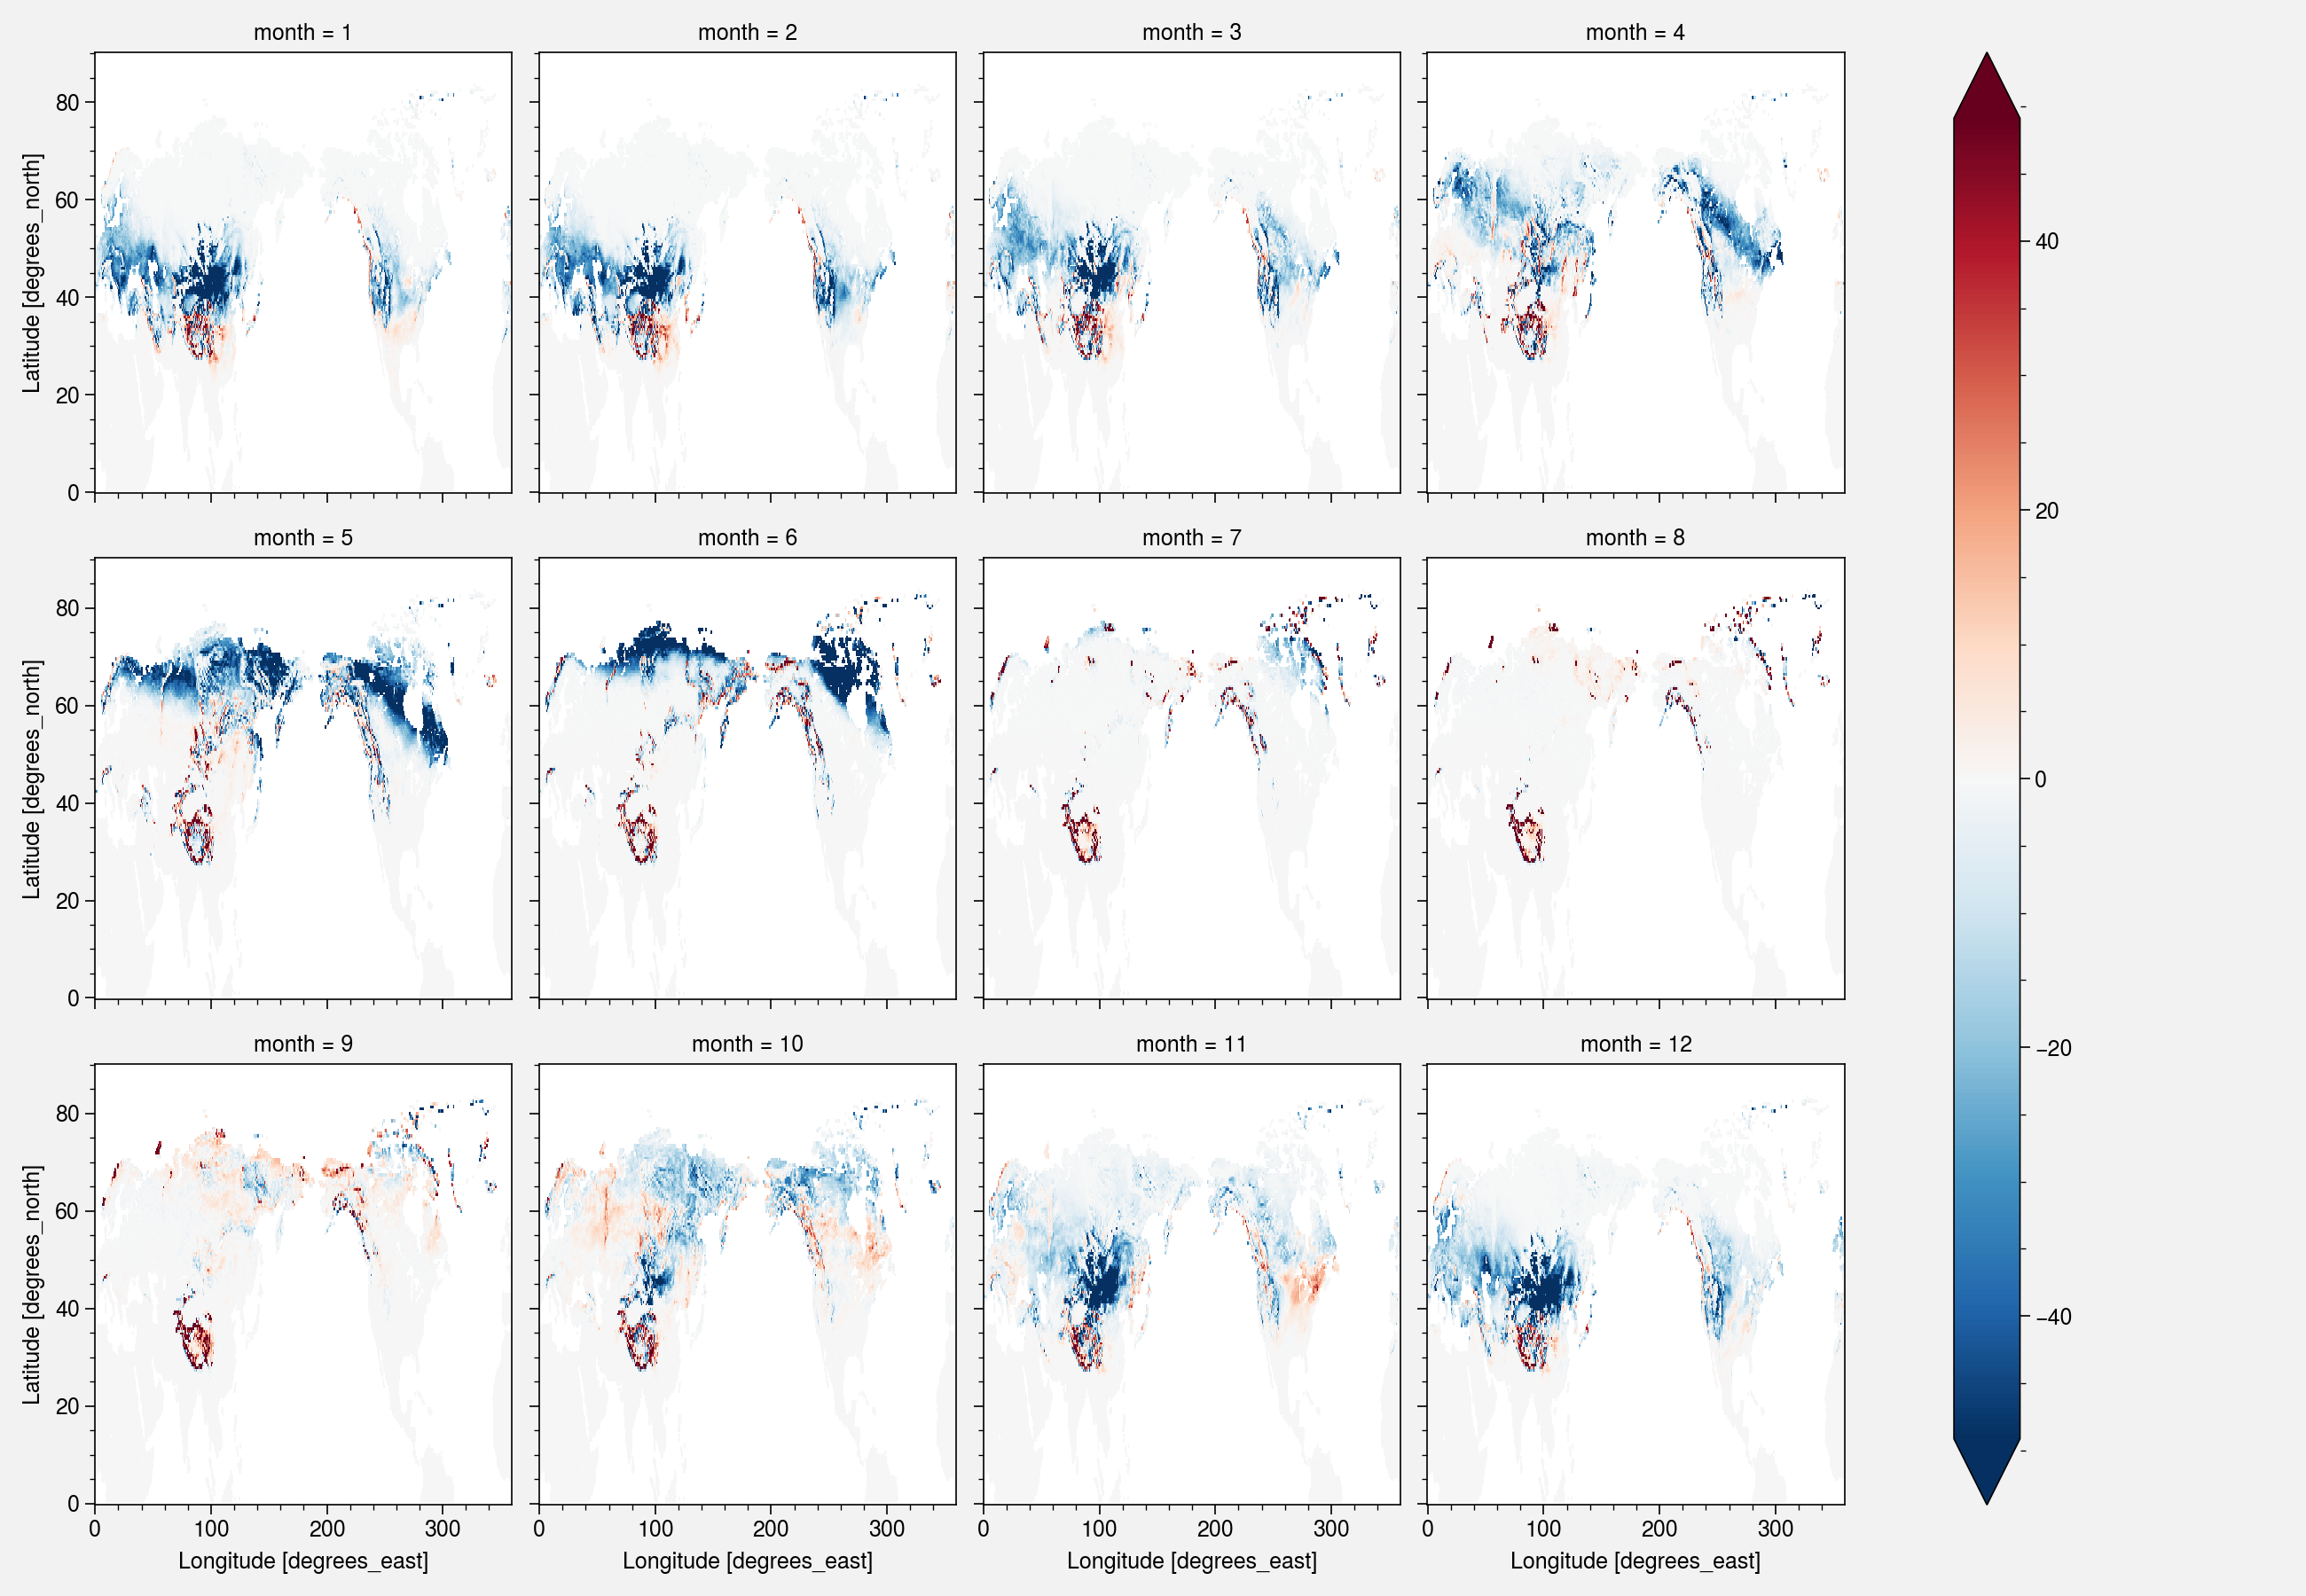

In [42]:
(da_HR_NH_mon_clim - obs_regrid_NH_mon_clim).plot(col='month', col_wrap=4, robust=True)

In [47]:
da_HR_NH_mon_clim.month

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [49]:
label

'Snow Cover Extent'

In [50]:
period.start

'1999'

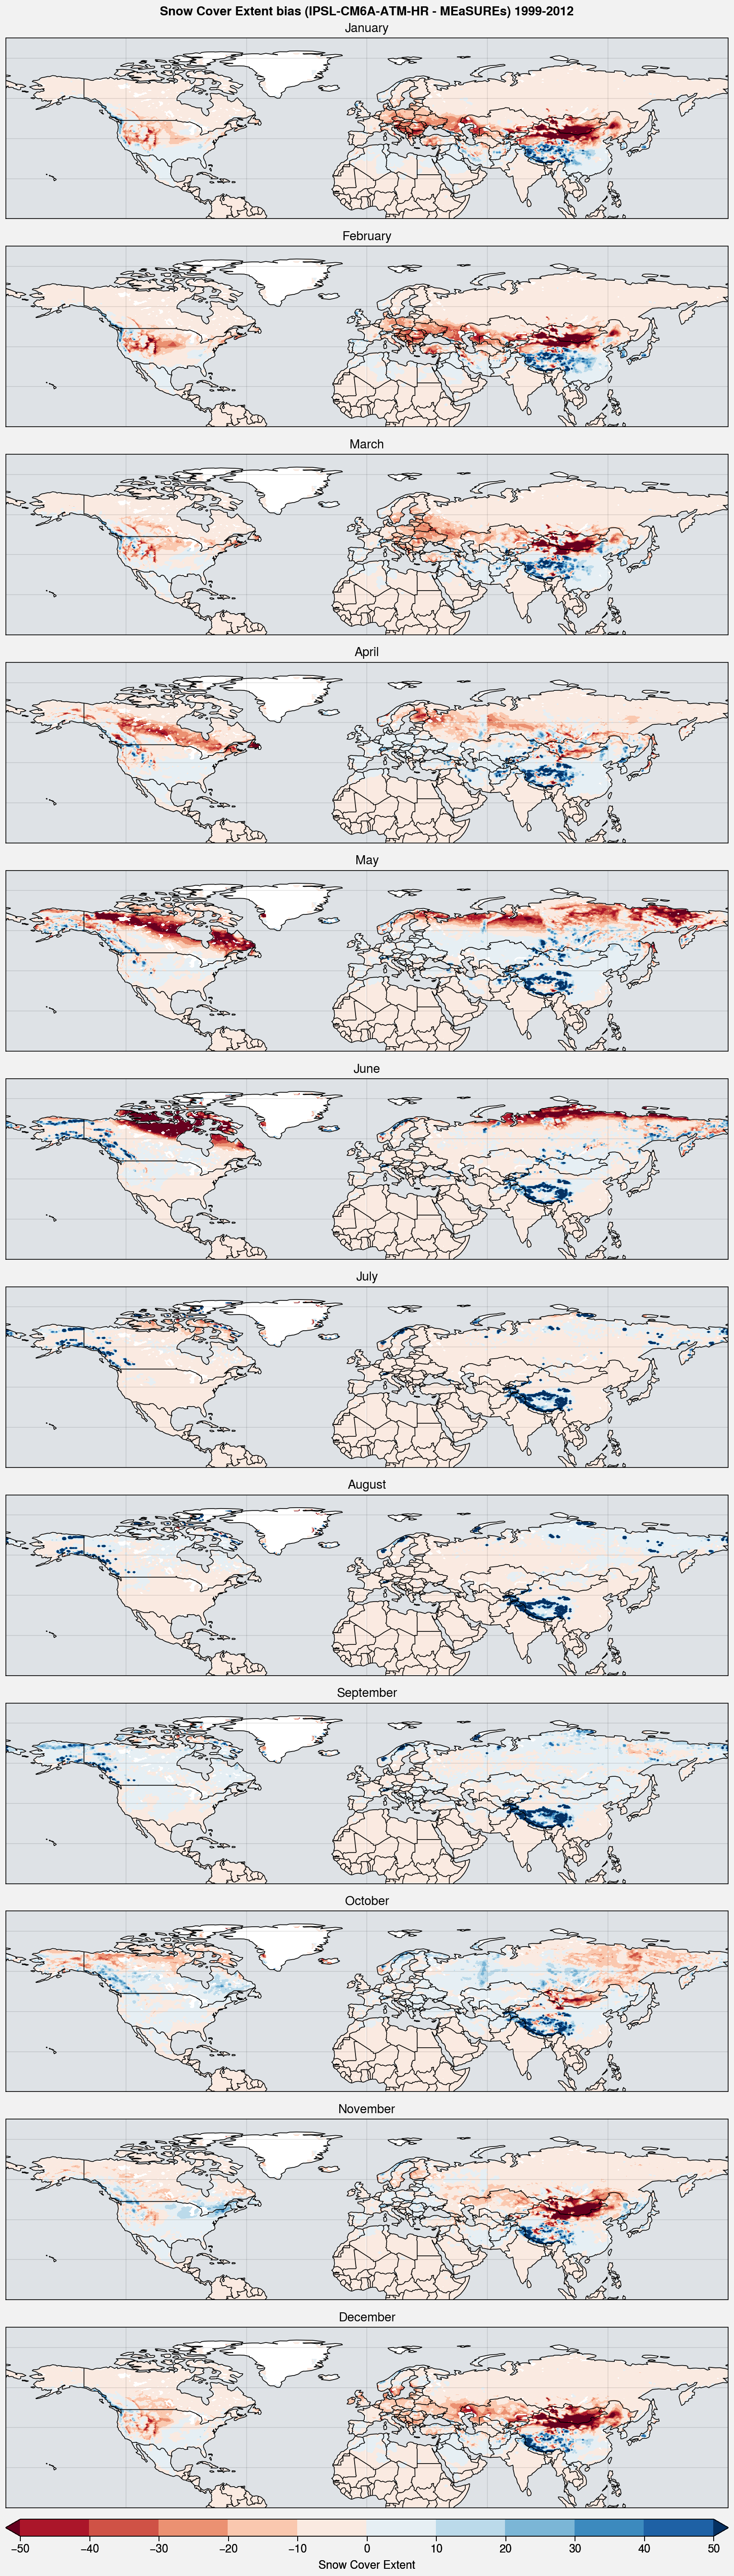

In [61]:
import calendar

fig, axs = plot.subplots(nrows=12, ncols=1, proj='cyl', axwidth=8)

for i, ax in enumerate(axs):
    m = ax.contourf(
        (da_HR_NH_mon_clim - obs_regrid_NH_mon_clim).isel(month=i), 
        cmap='RdBu', levels=plot.arange(-50,50, 10), extend='both'
    )
    ax.format(title=calendar.month_name[i+1])
    
fig.colorbar(m, label=label, loc='b')

axs.format(
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+' bias (IPSL-CM6A-ATM-HR - MEaSUREs) '+period.start+'-'+period.stop, abc=False, latlim=(0,90)
)

fig.save('img/'+var+'/mon_'+var+'_bias_IPSL-CM6A-ATM-HR_-_MEaSUREs_'+period.start+'-'+period.stop+'.jpg')

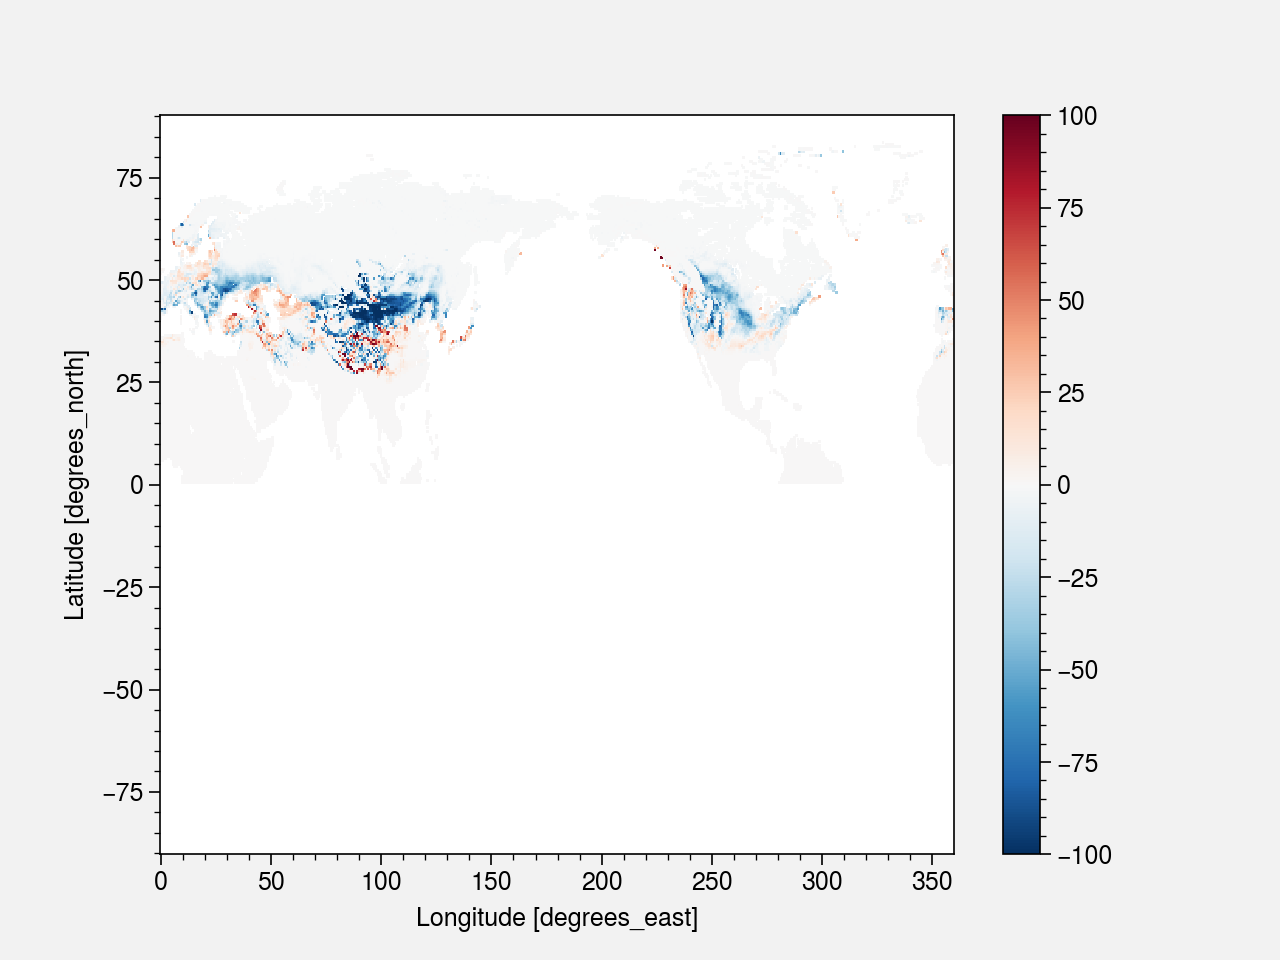

In [29]:
(da_HR[0] - obs_regrid[0]).plot()